# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
url = "https://raw.githubusercontent.com/kevinnkevinn/kelas.work/main/Housing%20Price%20Prediction/train.csv"

house = pd.read_csv(url)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [5]:
# check variabel NaN

total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum() / house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data['percent'] = (missing_data['percent'] * 100).round(2).astype(str) + '%'

missing_data.head(20)

,total,percent
PoolQC,1453,99.52%
MiscFeature,1406,96.3%
Alley,1369,93.77%
Fence,1179,80.75%
FireplaceQu,690,47.26%
LotFrontage,259,17.74%
GarageYrBlt,81,5.55%
GarageCond,81,5.55%
GarageType,81,5.55%
GarageFinish,81,5.55%


In [6]:
# Drop variabel NaN
house = house.dropna(axis=1, how = 'any')
house

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
# check variabel NaN
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum() / house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data['percent'] = (missing_data['percent'] * 100).round(2).astype(str) + '%'

missing_data.head(20)

,total,percent
Id,0,0.0%
Fireplaces,0,0.0%
1stFlrSF,0,0.0%
2ndFlrSF,0,0.0%
LowQualFinSF,0,0.0%
GrLivArea,0,0.0%
BsmtFullBath,0,0.0%
BsmtHalfBath,0,0.0%
FullBath,0,0.0%
HalfBath,0,0.0%


In [8]:
# Separate data into numerical & categorical
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [11]:
house_numeric.to_csv('house_numeric.csv')
house_categorical.to_csv('house_catgeorical.csv')

## Categorical Variabel

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

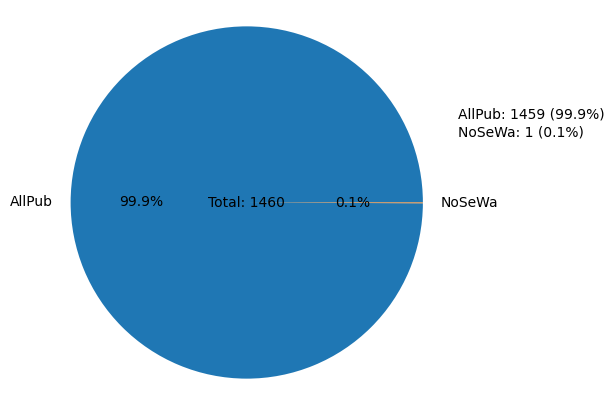

In [13]:
# Retrieve data
utilities_counts = house_categorical['Utilities'].value_counts()
utilities_percentages = house_categorical['Utilities'].value_counts(normalize=True)

# Creating a pie chart plot
plt.figure(figsize=(5, 5))

plt.pie(utilities_counts, labels=utilities_counts.index, autopct='%1.1f%%')
plt.axis('equal')

plt.text(0, 0, f"Total: {sum(utilities_counts)}", ha='center', va='center')

label_y = 0.5
for i, (count, percentage) in enumerate(zip(utilities_counts, utilities_percentages)):
    label_x = 1.2
    label = f"{utilities_counts.index[i]}: {count} ({percentage*100:.1f}%)"
    plt.text(label_x, label_y, label, ha='left', va='center')
    label_y -= 0.1

plt.show()

## HouseStyle

HouseStyle: Style of the property (e.g. 1 floor, 2 floors, etc.)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [25]:
# Menghitung kuantitas nilai HouseStyle
value_counts = house_categorical['HouseStyle'].value_counts()

# Menampilkan kuantitas nilai
value_counts

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

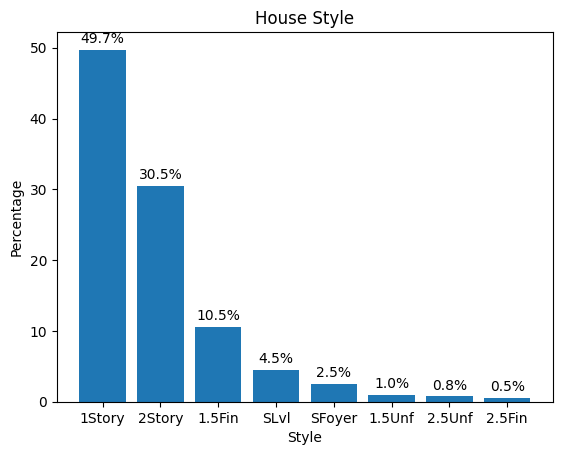

In [26]:
# Menghitung persentase nilai HouseStyle
percentages = value_counts / len(house_categorical['HouseStyle']) * 100

# Membuat grafik batang
plt.bar(value_counts.index, percentages)

# Menambahkan nilai persentase di atas setiap batang
for i, percent in enumerate(percentages):
    plt.text(i, percent + 1, "{:.1f}%".format(percent), ha='center')

# Menambahkan judul dan label sumbu
plt.title('House Style')
plt.xlabel('Style')
plt.ylabel('Percentage')

plt.show()

### ExterQual

ExterQual: Exterior material quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

In [21]:
# Menghitung kuantitas nilai ExterQual
value_counts = house_categorical['ExterQual'].value_counts()

# Menampilkan kuantitas nilai
value_counts

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

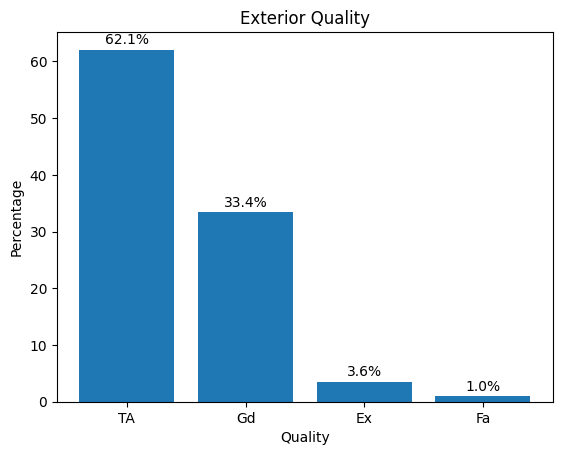

In [24]:
# Menghitung persentase nilai ExterQual
percentages = value_counts / len(house_categorical['ExterQual']) * 100

# Membuat grafik batang
plt.bar(value_counts.index, percentages)

# Menambahkan nilai persentase di atas setiap batang
for i, percent in enumerate(percentages):
    plt.text(i, percent + 1, "{:.1f}%".format(percent), ha='center')

# Menambahkan judul dan label sumbu
plt.title('Exterior Quality')
plt.xlabel('Quality')
plt.ylabel('Percentage')

plt.show()

#### **Analysis on categorical variables**

- In the Utilities variable there is unbalanced data where AllPub (All public Utilities (E,G,W,& S)) gets 100% while NoSeWa has no value (0%).

- In the 'HouseStyle' variable, there is unbalanced data where 1Story has almost 50%; 2Story has 30%; followed by 1.5Fin has 10%; and the remaining SFoyer, 1.5Unf, 2.5Unf, and 2.5Fin have less than 10% each.

- When the data obtained is like this, we can make a statement "The majority of people like the type of house that has one floor." and from there we can ask "Why do people like the type of house that has one floor?"

- In the ExterQual variable, there are more than 60% of the exterior material quality of residents' houses classified as average (in general), followed by good exterior quality of more than 30%, and the rest, namely excellent and fair exterior quality, each below 10%.


## Numerical Variable

### SalePrice

* SalePrice is the target variable that we want to predict
* Physically, this means the price of the property being sold

<ipython-input-27-9c74ffcc28cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.000
Mean: 180921.196
Standard Deviation: 79442.503


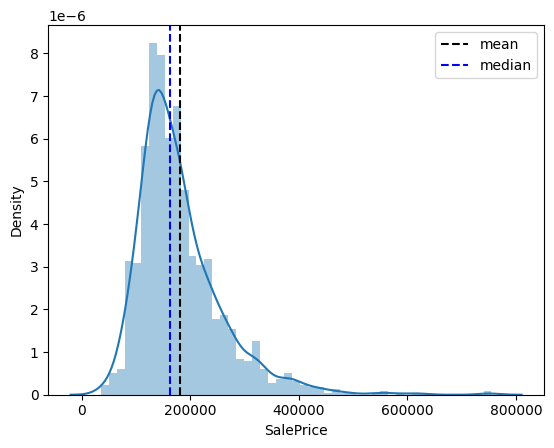

In [27]:
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(x.median(), color='b', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)

median = x.median()
mean = x.mean()
std = x.std()

print('Median: {:.3f}'.format(median))
print('Mean: {:.3f}'.format(mean))
print('Standard Deviation: {:.3f}'.format(std))

plt.show()

#### **Analysis of the `SalePrice` variable`**

* This graph shows a right skewed distribution.
* Mostly, house prices are in the range of 100,000 to 300,000

### GrLivArea

* GrLivArea contains information about the living area above ground level (excluding basement).
* The unit used is *square feet*

<ipython-input-28-e35dac5e7ff3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.000
Mean: 180921.196
Standard Deviation: 79442.503


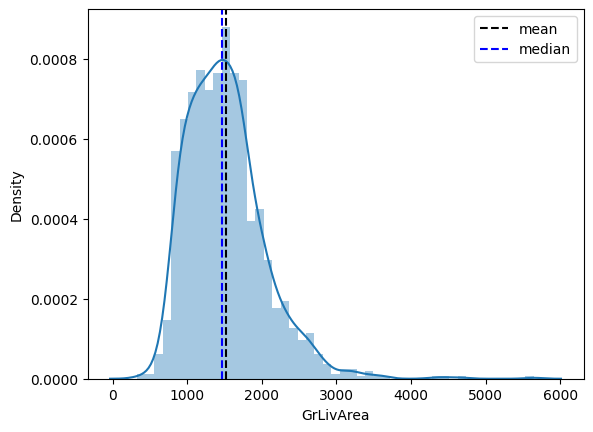

In [28]:
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label = 'mean')
line2 = plt.axvline(x.median(), color='b', linestyle='--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)

print('Median: {:.3f}'.format(median))
print('Mean: {:.3f}'.format(mean))
print('Standard Deviation: {:.3f}'.format(std))

plt.show()

#### **Analysis of the variable `GrlivArea`**

* This graph is right skewed because the median value is smaller than the mean value.
* Mostly, homes in the US have a living area of 1000 to 2000 square feet.

### GarageArea

* GarageArea contains information about the garage area (if any)
* The unit used is *square feet*

<ipython-input-29-708518bda3a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.000
Mean: 180921.196
Standard Deviation: 79442.503


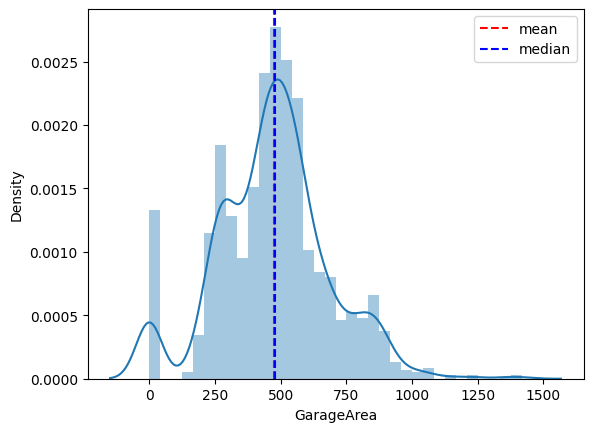

In [29]:
x = house_numeric["GarageArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='r', linestyle='--', label = 'mean')
line2 = plt.axvline(x.median(), color='b', linestyle='--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)

print('Median: {:.3f}'.format(median))
print('Mean: {:.3f}'.format(mean))
print('Standard Deviation: {:.3f}'.format(std))

plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Grafik ini menunjukkan skew kiri (left skewed) karena nilai median lebih besar daripada nilai mean.
* Mostly, perumahaan di US memiliki luas garasi sekita 250 sampai 875 square feet.

## Pemrosesan Data Variabel Numerikal

<ipython-input-30-30d6277bed9f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median value after log-10 transformation: 5.212
Mean value after log-10 transformation: 5.222
Standard deviation value after log-10 transformation: 0.173


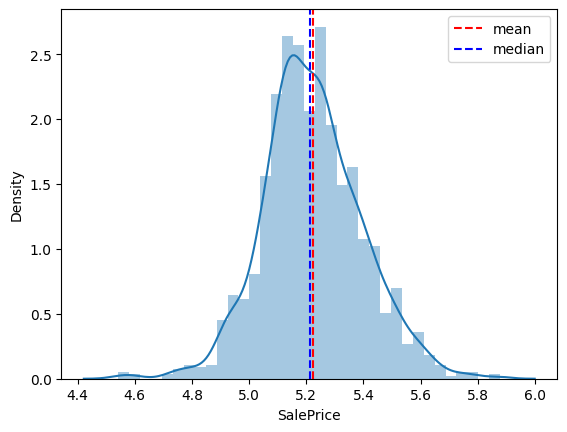

In [30]:
# Transform the data using log-10
x = np.log10(house_numeric["SalePrice"])


sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='r', linestyle='--', label='mean')
line2 = plt.axvline(x.median(), color='b', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)


median = x.median()
mean = x.mean()
std = x.std()

print("Median value after log-10 transformation: {:.3f}".format(median))
print("Mean value after log-10 transformation: {:.3f}".format(mean))
print("Standard deviation value after log-10 transformation: {:.3f}".format(std))

plt.show()

<ipython-input-31-ce95b61716a2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median value after log-10 transformation: 3.166
Mean value after log-10 transformation: 3.156
Standard deviation value after log-10 transformation: 0.145


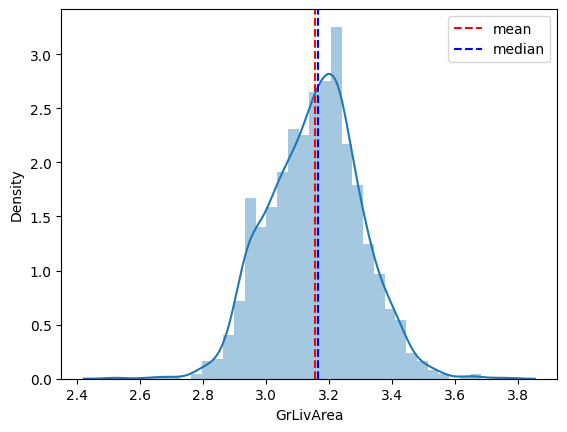

In [31]:
x = np.log10(house_numeric["GrLivArea"])

# Plot the distribution
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='r', linestyle='--', label='mean')
line2 = plt.axvline(x.median(), color='b', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)

# Calculate and print the median, mean, and standard deviation
median = x.median()
mean = x.mean()
std = x.std()

print("Median value after log-10 transformation: {:.3f}".format(median))
print("Mean value after log-10 transformation: {:.3f}".format(mean))
print("Standard deviation value after log-10 transformation: {:.3f}".format(std))

plt.show()

In [32]:
# see how many zero values there are in GarageArea
print("Number of non-zero values: ", np.sum(house_numeric["GarageArea"] != 0))
print("Number of zero values: ", np.sum(house_numeric["GarageArea"] == 0))

Number of non-zero values:  1379
Number of zero values:  81


<ipython-input-33-9d2ceeeb3fb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median value after removing zero values from GarageArea: 484.00
Mean value after removing zero values from GarageArea: 500.76
Standard deviation value after removing zero values from GarageArea: 185.68


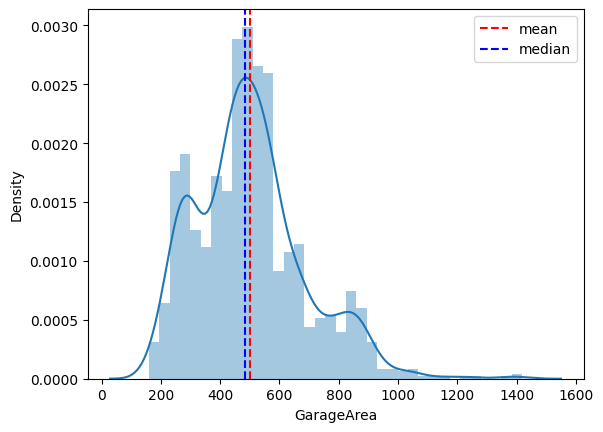

In [33]:
# Removing zero values from GarageArea
x = house_numeric["GarageArea"][house_numeric["GarageArea"] != 0]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='r', linestyle='--', label='mean')
line2 = plt.axvline(x.median(), color='b', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)

print('Median value after removing zero values from GarageArea: {:.2f}'.format(x.median()))
print('Mean value after removing zero values from GarageArea: {:.2f}'.format(x.mean()))
print('Standard deviation value after removing zero values from GarageArea: {:.2f}'.format(x.std()))

plt.show()

#### **Explanation and analysis of data processing**

- After log 10 transformation on SalePrice, the graph shows skewed to the right.
- On GrLivArea after log 10 transformation, the graph shows skew left (skewed to the left)
- On GarageArea after removing zero values, the graph shows skewed to the right because the mean value is greater than the median value.

# 2D Visualization

# Relationship between `GrLivArea` and `SalePrice`

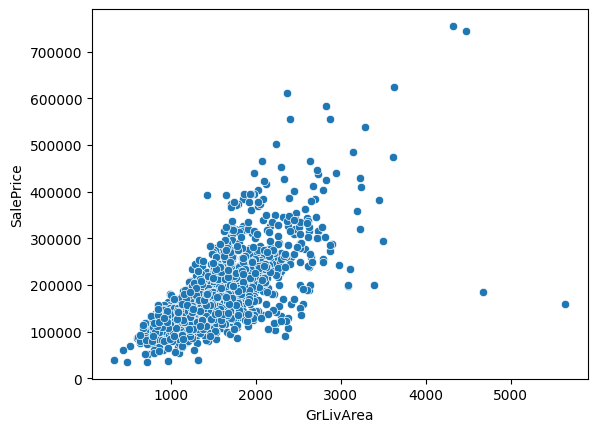

In [34]:
ax = sns.scatterplot(y='SalePrice', x='GrLivArea', data = house_numeric)
plt.show()

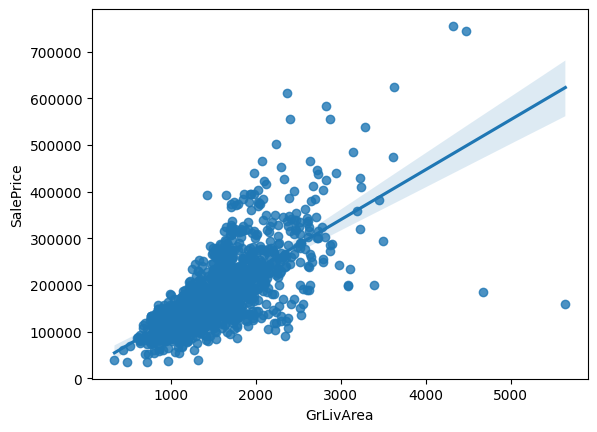

In [35]:
ax = sns.regplot(y='SalePrice', x='GrLivArea', data = house_numeric)
plt.show()

# Relationship between `GarageArea` and `SalePrice`

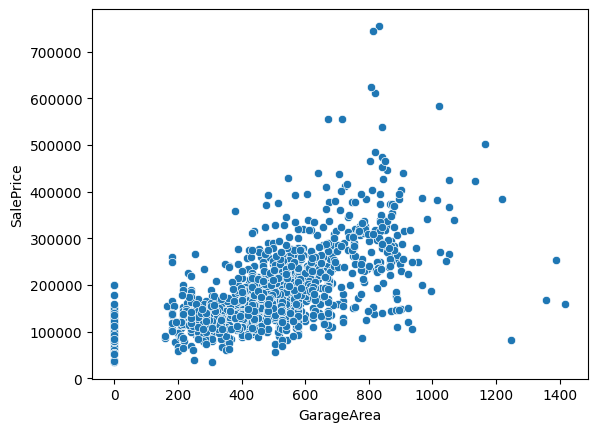

In [36]:
ax = sns.scatterplot(y='SalePrice', x='GarageArea', data = house_numeric)
plt.show()

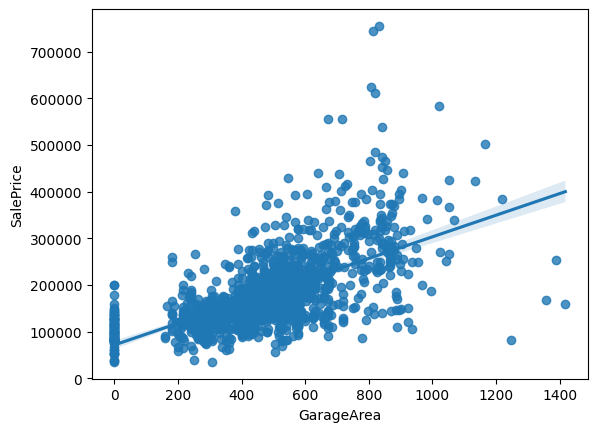

In [37]:
ax = sns.regplot(y='SalePrice', x='GarageArea', data = house_numeric)
plt.show()

#### **The results of the analysis of the relationship between variables**

* Dapat dilihat bahwa pada hubungan GrLivArea dengan SalePrice maupun hubungan anatara GarageArea dengan SalePrice memiliki korelasi positif dimana nilai Y cenderung meningkat mengikuti peningkatkan nilai X.